In [28]:
# Setup feedback system


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew, yeojohnson
from sklearn.feature_selection import mutual_info_classif

# Load data
df = pd.read_csv("C:/Users/ASUS/Desktop/archive1/healthcare-dataset-stroke-data.csv")  # Update this path to your dataset

# Display first few rows of the dataset
print(df.head())
print("-" * 110)
df.info()
print("-" * 110)
df.describe()

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
--------------------------------------------------------

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [29]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
num_features = [feature for feature in df.columns if df[feature].dtype != 'object']

# Display categorical features
print("Categorical Features:")
print(cat_features)

# Display numerical features
print("\nNumerical Features:")
print(num_features)

Categorical Features:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Numerical Features:
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [30]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
for feature in num_features:
    df[feature] = imputer.fit_transform(df[feature].values.reshape(-1,1))

# Handling missing values - Fill NaN with the mode for categorical features
'''for feature in cat_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
binary_columns = ['gender_Male', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
for col in binary_columns:
    df[col] = df[col].astype(int)'''

print(df.head())
print("-" * 110)
df.info()
print("-" * 110)
df.describe()


        id  gender   age  hypertension  heart_disease ever_married  \
0   9046.0    Male  67.0           0.0            1.0          Yes   
1  51676.0  Female  61.0           0.0            0.0          Yes   
2  31112.0    Male  80.0           0.0            1.0          Yes   
3  60182.0  Female  49.0           0.0            0.0          Yes   
4   1665.0  Female  79.0           1.0            0.0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked     1.0  
1     never smoked     1.0  
2     never smoked     1.0  
3           smokes     1.0  
4     never smoked     1.0  
--------------

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [31]:
disc_features = cat_features + [feature for feature in num_features if len(df[feature].unique()) < 10]
cont_features = [feature for feature in num_features if feature not in disc_features]
cont_features.remove('id')

print("Discrete Features:")
print(disc_features)

print("\nContinuous Features:")
print(cont_features)

Discrete Features:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']

Continuous Features:
['age', 'avg_glucose_level', 'bmi']


In [32]:
for col in disc_features:
    print(f"Feature name: {col}")
    print(f"Unique values and their proportion {df[col].value_counts(normalize=True) * 100}")
    print("-" * 50)

Feature name: gender
Unique values and their proportion gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
--------------------------------------------------
Feature name: ever_married
Unique values and their proportion ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
--------------------------------------------------
Feature name: work_type
Unique values and their proportion work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
--------------------------------------------------
Feature name: Residence_type
Unique values and their proportion Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
--------------------------------------------------
Feature name: smoking_status
Unique values and their proportion smoking_status
never smoked       37.025440
Unk

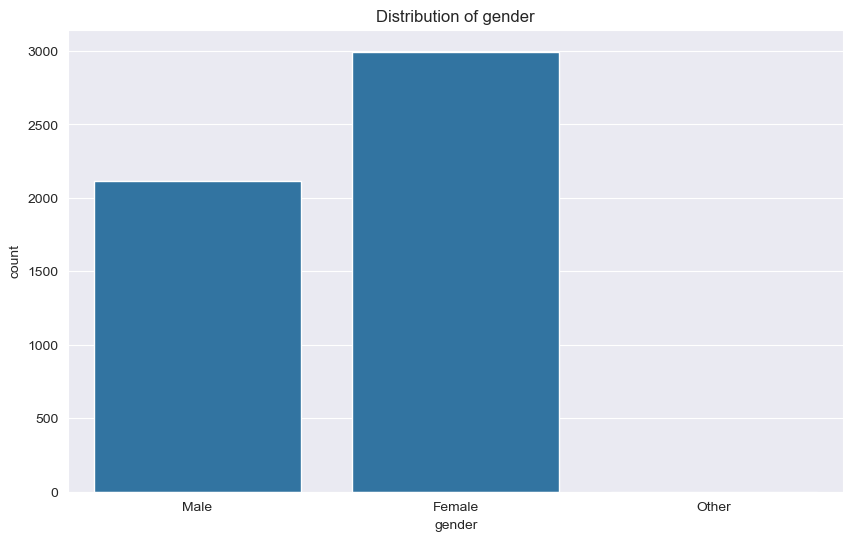

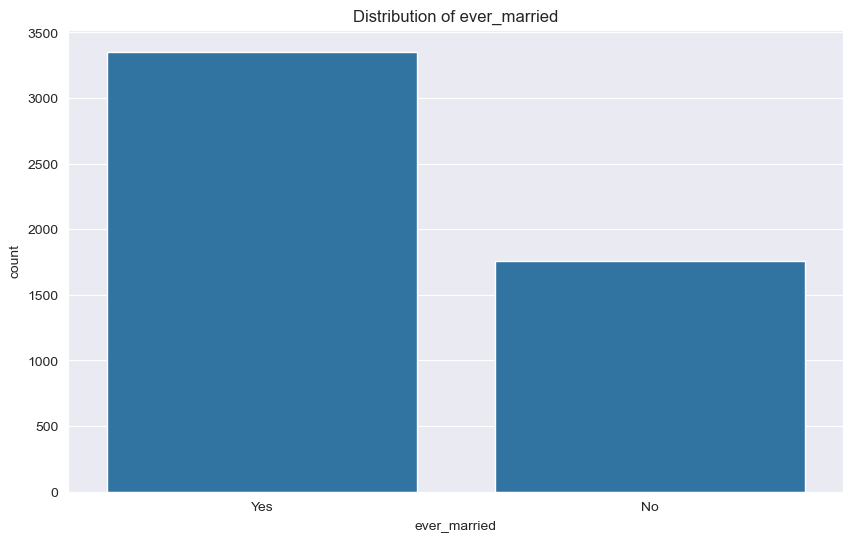

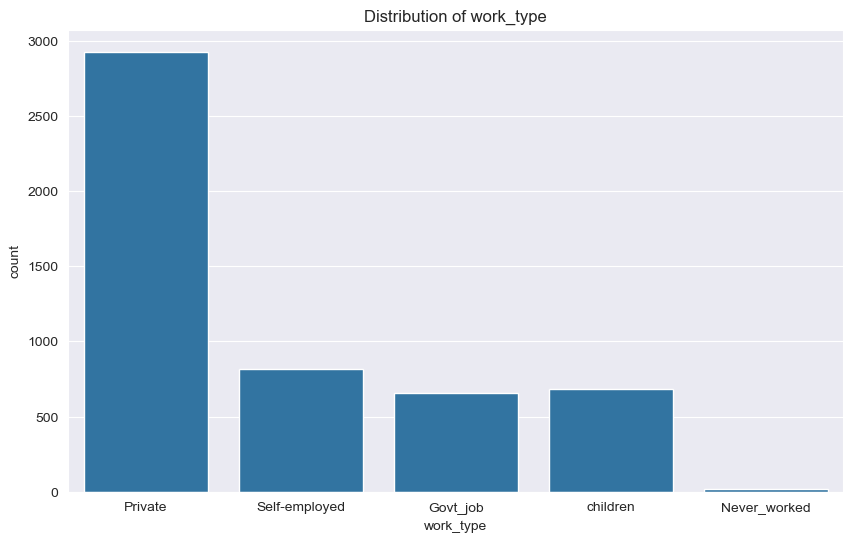

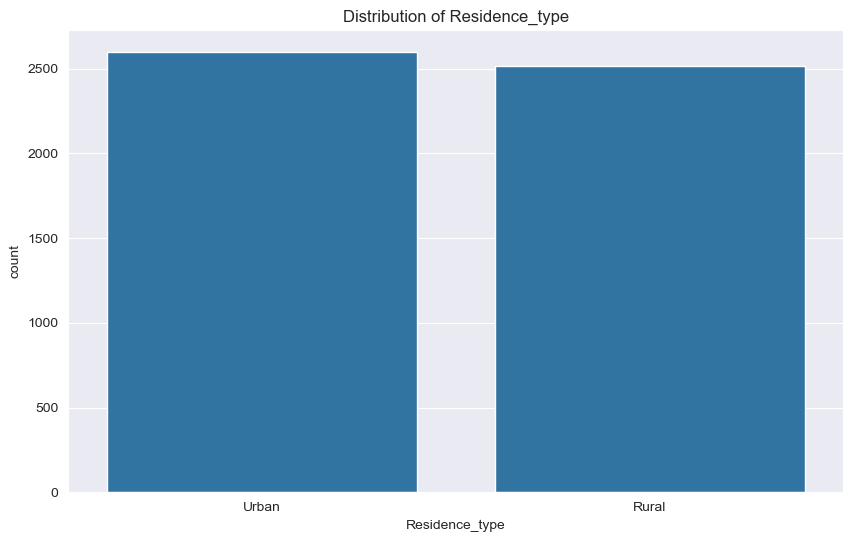

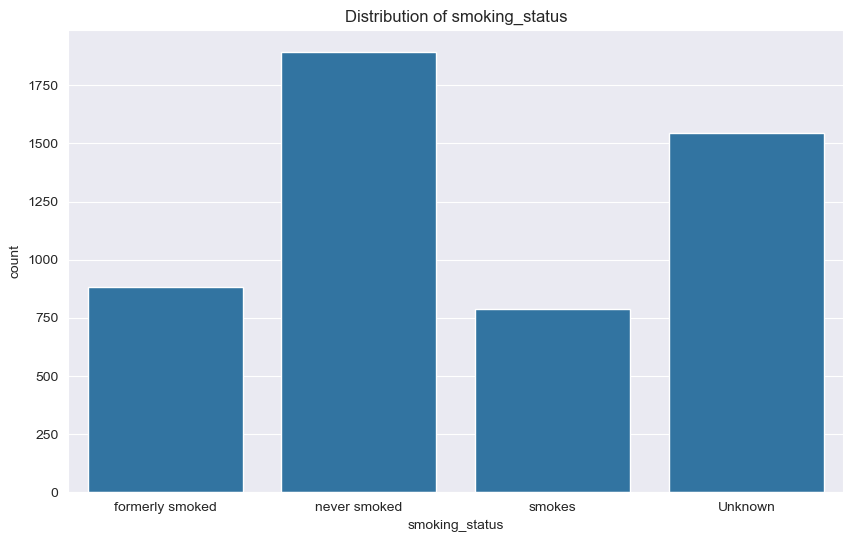

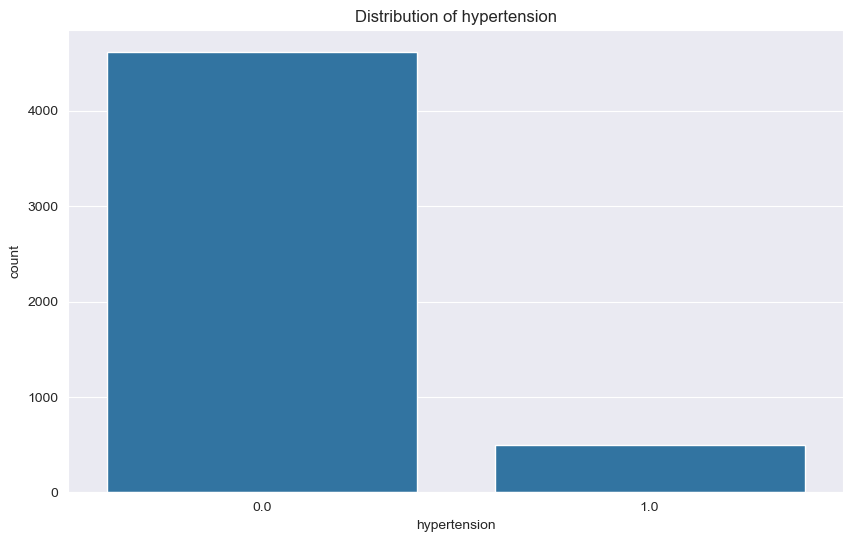

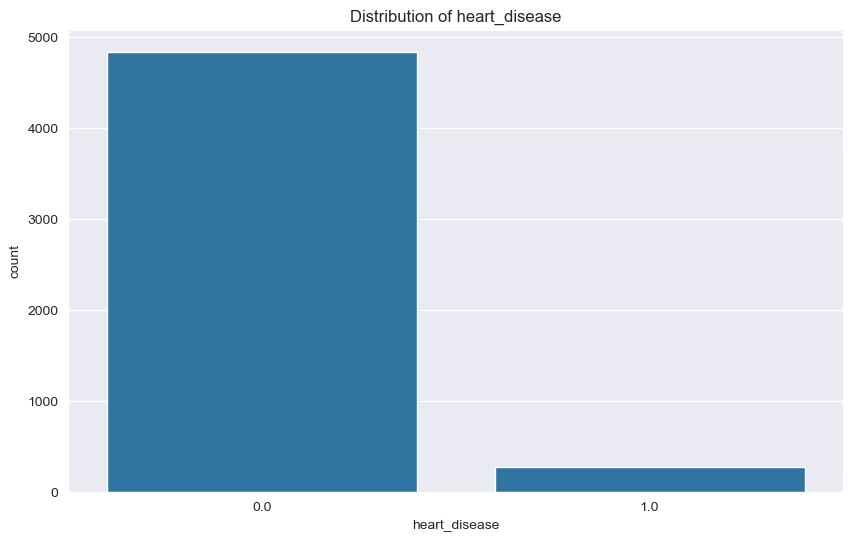

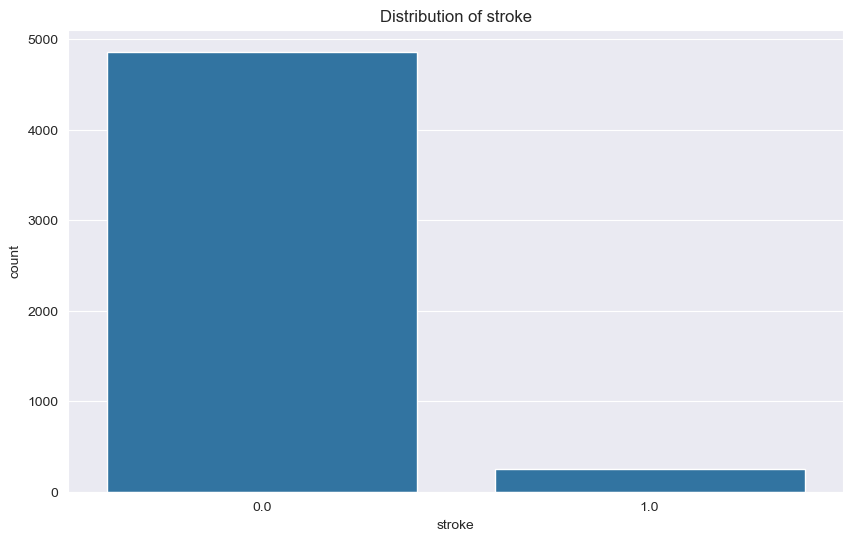

In [33]:
for feature in disc_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f"Distribution of {feature}")



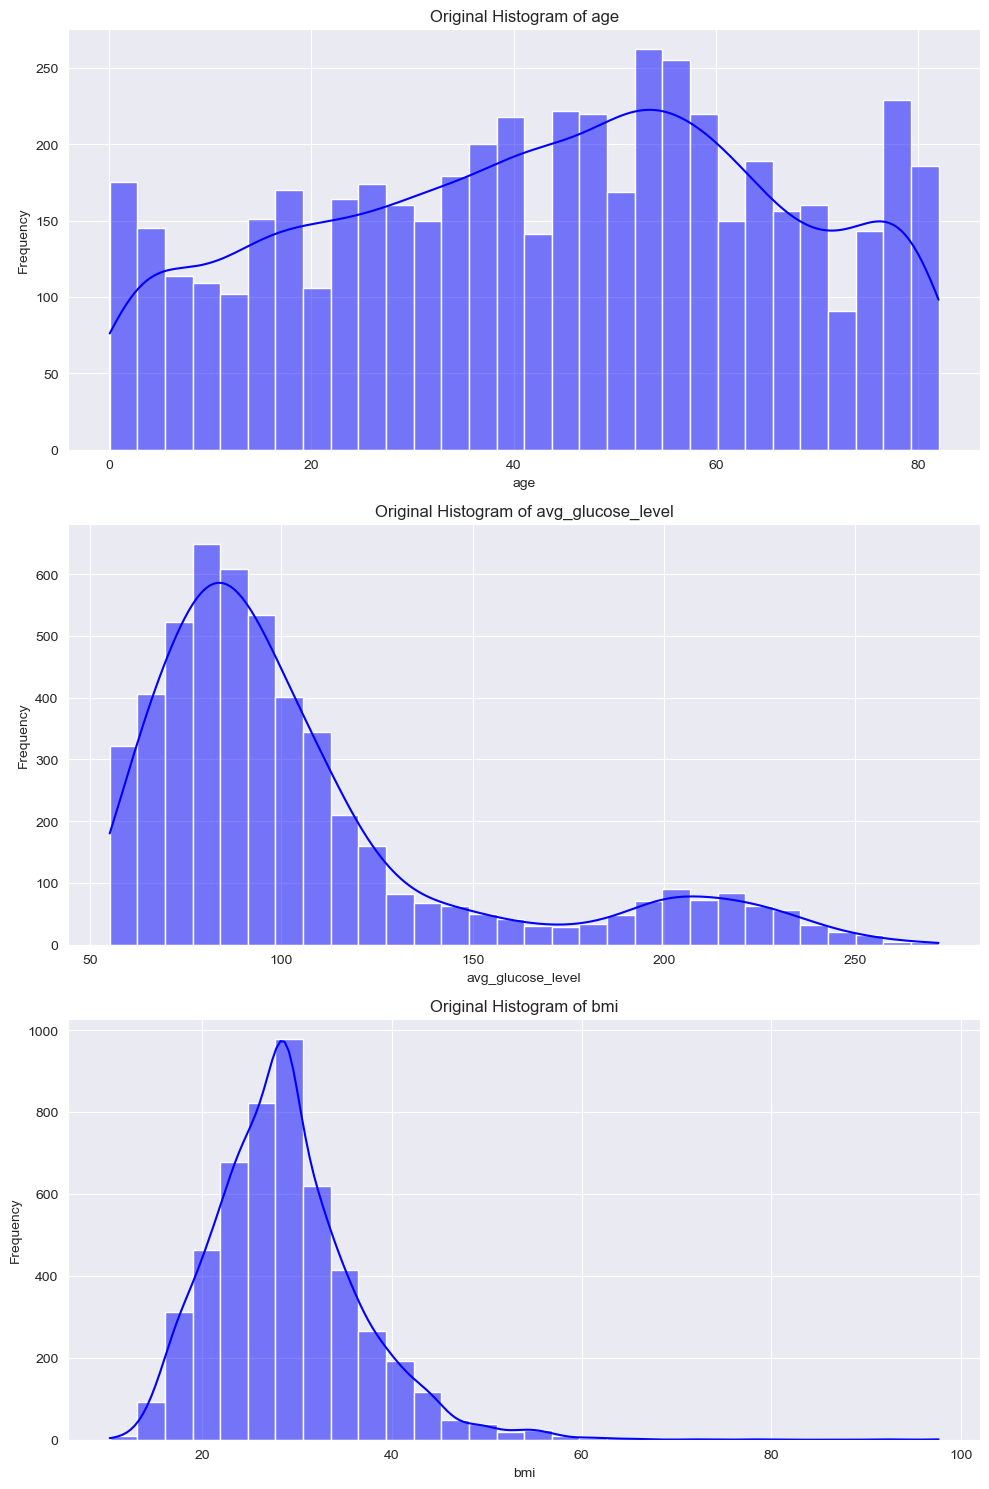

In [34]:
features_to_plot = cont_features

def plot_histograms(original_df, features):
    cont_features = len(features)
    fig, axs = plt.subplots(cont_features, 1, figsize=(10, cont_features * 5))

    for i, feature in enumerate(features):
        # Plot original histograms
        sns.histplot(original_df[feature], bins=30, kde=True, ax=axs[i], color='blue')
        axs[i].set_title(f'Original Histogram of {feature}')
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


plot_histograms(df,cont_features)

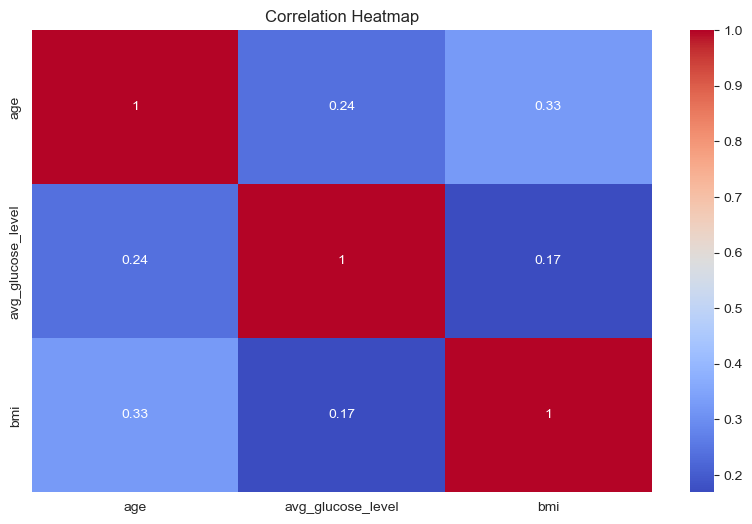

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[cont_features].corr(), cbar=True, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

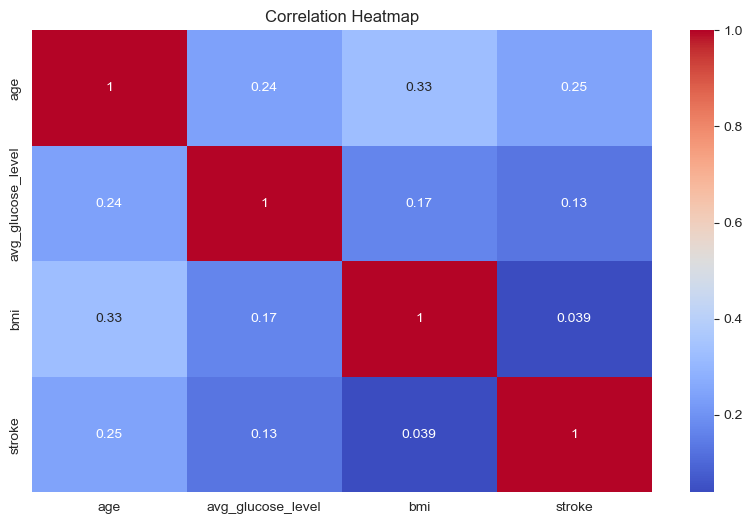

['age', 'avg_glucose_level', 'bmi']


In [36]:
plt.figure(figsize=(10, 6))
cont_features.append('stroke')
sns.heatmap(df[cont_features].corr(), cbar=True, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
cont_features.remove('stroke')
print(cont_features)

In [37]:
bins = [0, 30, 50, 70, 100]
labels = ['0-30', '31-50', '51-70', '71-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

# Ensure age_group binary columns are represented as 1 and 0
age_group_columns = ['age_group_31-50', 'age_group_51-70', 'age_group_71-100']
for col in age_group_columns:
    df[col] = df[col].astype(int)

In [38]:
# Normalize avg_glucose_level and bmi
df['avg_glucose_level'] = (df['avg_glucose_level'] - df['avg_glucose_level'].mean()) / df['avg_glucose_level'].max()
df['bmi'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].max()

# Drop irrelevant features
df.drop(['id'], axis=1, inplace=True)

# Display the cleaned dataset
print(df)



      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0           0.0            1.0          Yes        Private   
1     Female  61.0           0.0            0.0          Yes  Self-employed   
2       Male  80.0           0.0            1.0          Yes        Private   
3     Female  49.0           0.0            0.0          Yes        Private   
4     Female  79.0           1.0            0.0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0           1.0            0.0          Yes        Private   
5106  Female  81.0           0.0            0.0          Yes  Self-employed   
5107  Female  35.0           0.0            0.0          Yes  Self-employed   
5108    Male  51.0           0.0            0.0          Yes        Private   
5109  Female  44.0           0.0            0.0          Yes       Govt_job   

     Residence_type  avg_glucose_level           bm


Mutual Information Scores:
age                               0.042669
age_group_71-100                  0.019405
bmi                               0.010492
ever_married_Yes                  0.007666
hypertension                      0.005976
heart_disease                     0.005897
age_group_31-50                   0.005258
avg_glucose_level                 0.005204
work_type_children                0.005034
smoking_status_formerly smoked    0.003871
gender_Male                       0.003660
Residence_type_Urban              0.003475
work_type_Self-employed           0.001770
gender_Other                      0.000986
smoking_status_never smoked       0.000290
work_type_Never_worked            0.000068
work_type_Private                 0.000000
age_group_51-70                   0.000000
smoking_status_smokes             0.000000
Name: MI Scores, dtype: float64



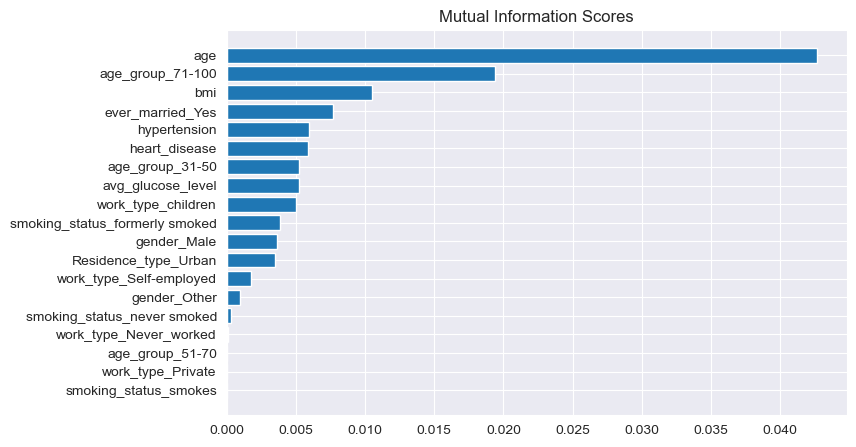

In [39]:
for feature in cat_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
binary_columns = ['gender_Male', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
for col in binary_columns:
    df[col] = df[col].astype(int)
# Define function to calculate mutual information scores
def make_mi_scores(X, y, disc_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=disc_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Prepare the data for mutual information calculation
X = df.copy()
y = X.pop('stroke')

# Re-identify discrete features in the encoded dataset
disc_features_bool = [col in disc_features for col in X.columns]

# Calculate mutual information scores
mi_scores = make_mi_scores(X, y, disc_features=disc_features_bool)
print(f"\nMutual Information Scores:\n{mi_scores}\n")

# Define function to plot mutual information scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# Plot mutual information scores
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores)
plt.show()



['age', 'avg_glucose_level', 'bmi']
Skewness before transformation:
age                 -0.137019
avg_glucose_level    1.571822
bmi                  1.076400
dtype: float64

Skewness after transformation:
age                 -0.137019
avg_glucose_level    0.220927
bmi                 -0.008866
dtype: float64


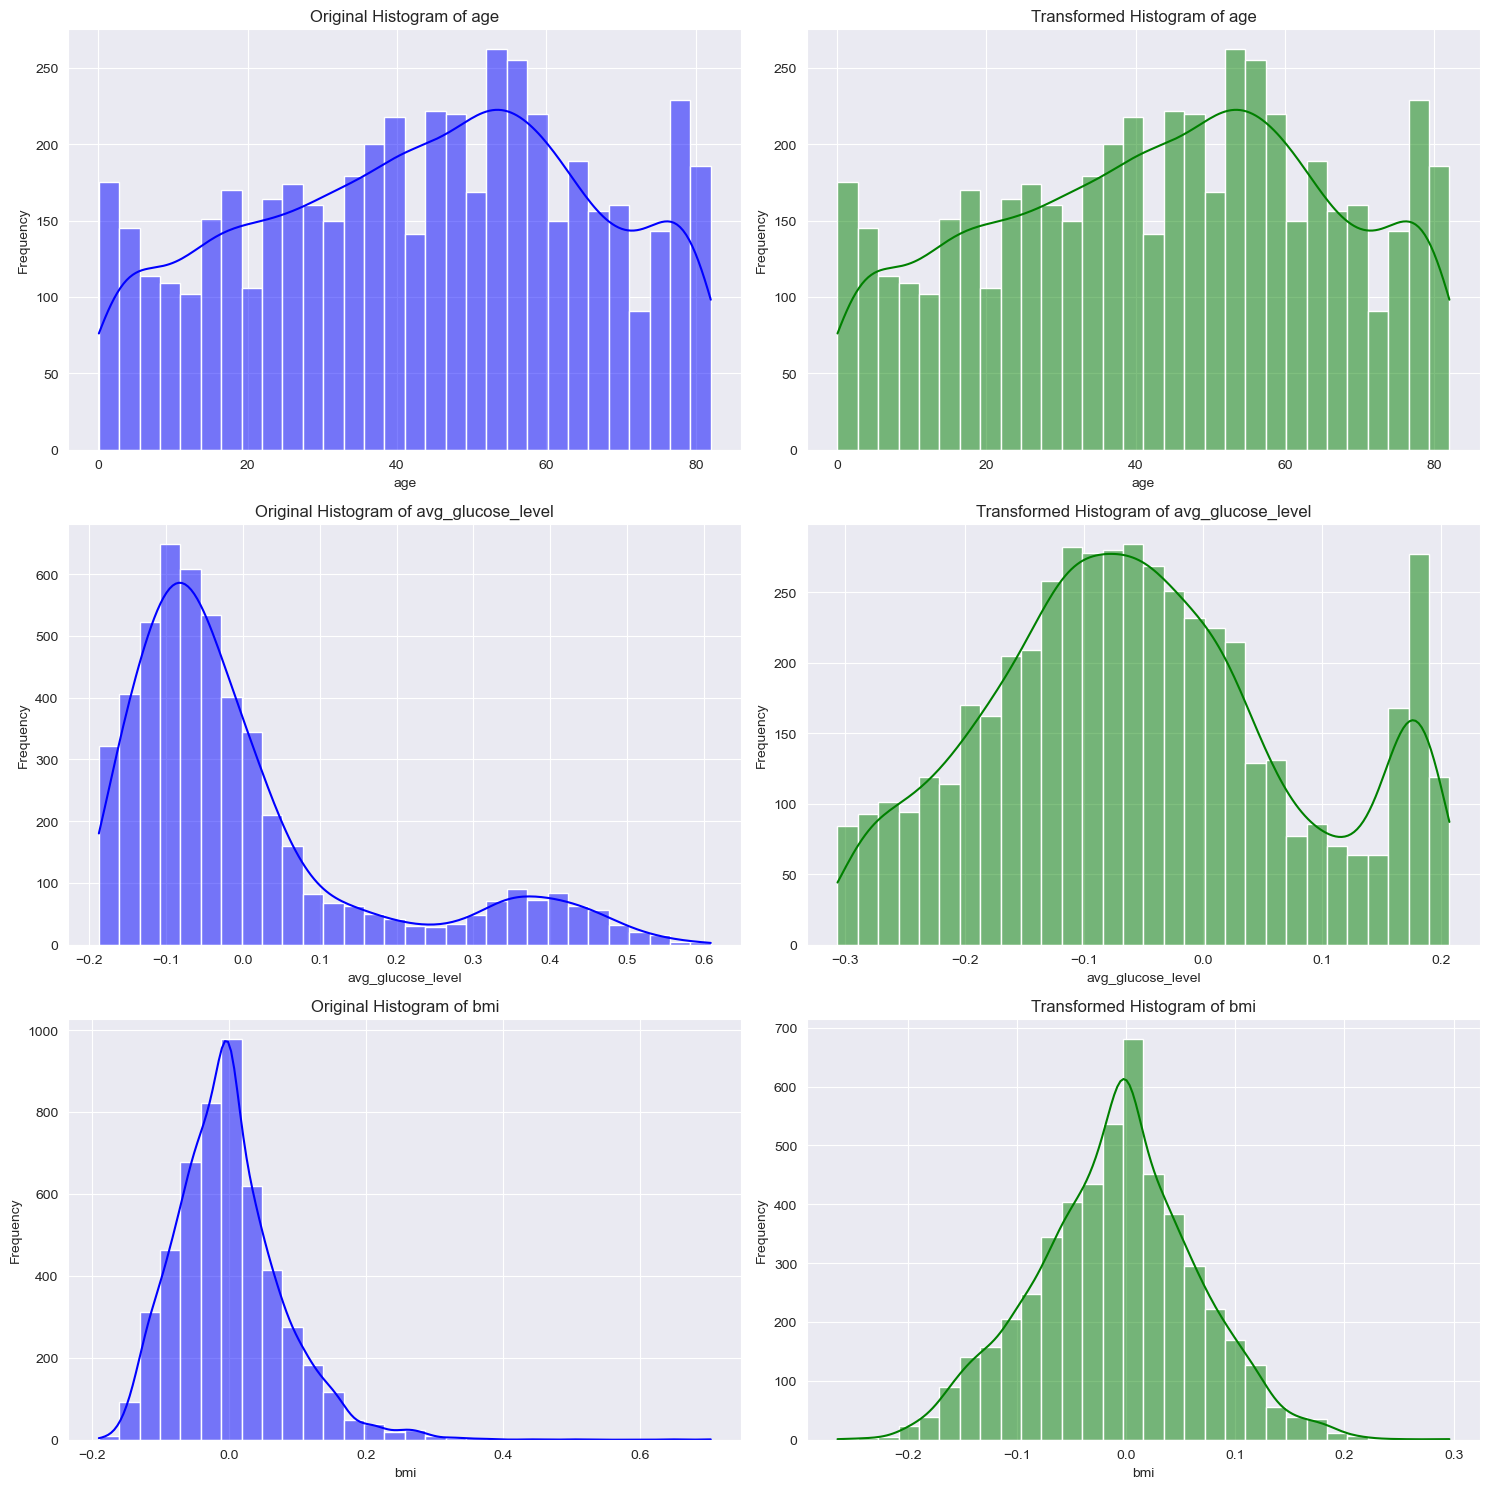

In [40]:
print(cont_features)

def handle_skewness(df, features, threshold=0.5):
    transformed_df = df.copy()

    for feature in features:
        # Calculate skewness
        feature_skewness = skew(df[feature].dropna())

        # Apply Yeo-Johnson transformation if skewness is above the threshold
        if abs(feature_skewness) > threshold:
            transformed_df[feature], _ = yeojohnson(df[feature].dropna())

    return transformed_df

# Handle skewness in continious features
df_transformed = handle_skewness(df, cont_features)

# Check skewness before and after transformation
def check_skewness(df, features):
    skewness = df[features].apply(lambda x: skew(x.dropna()))
    return skewness

# Print skewness before and after transformation
print("Skewness before transformation:")
print(check_skewness(df, cont_features))

print("\nSkewness after transformation:")
print(check_skewness(df_transformed, cont_features))

# Plot histograms of original and transformed features for comparison
def plot_histograms(original_df, transformed_df, features):
    cont_features = len(features)
    fig, axs = plt.subplots(cont_features, 2, figsize=(15, cont_features * 5))

    for i, feature in enumerate(features):
        # Plot original histograms
        sns.histplot(original_df[feature], bins=30, kde=True, ax=axs[i, 0], color='blue')
        axs[i, 0].set_title(f'Original Histogram of {feature}')
        axs[i, 0].set_xlabel(feature)
        axs[i, 0].set_ylabel('Frequency')

        # Plot transformed histograms
        sns.histplot(transformed_df[feature], bins=30, kde=True, ax=axs[i, 1], color='green')
        axs[i, 1].set_title(f'Transformed Histogram of {feature}')
        axs[i, 1].set_xlabel(feature)
        axs[i, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot histograms of original and transformed features
plot_histograms(df, df_transformed, cont_features)
df = df_transformed.copy()


In [41]:
!pip install imbalanced-learn

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEENN to the training set
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Check the distribution of the target variable after applying SMOTEENN
print("Original target variable distribution:")
print(y_train.value_counts())
print("\nTarget variable distribution after applying SMOTEENN:")
print(y_train_resampled.value_counts())

# Check the shape of the data before and after SMOTEENN
print("\nOriginal shape:", X_train.shape, y_train.shape)
print("New shape after SMOTEENN:", X_train_resampled.shape, y_train_resampled.shape)


Original target variable distribution:
stroke
0.0    3901
1.0     187
Name: count, dtype: int64

Target variable distribution after applying SMOTEENN:
stroke
1.0    3726
0.0    3016
Name: count, dtype: int64

Original shape: (4088, 19) (4088,)
New shape after SMOTEENN: (6742, 19) (6742,)


In [43]:
!pip install catboost

In [45]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier




def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

def evaluate_models(X, y, models):

    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    models_list = []
    accuracy_list = []
    auc= []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)

    return report

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier(),
     "Naive Bayes": GaussianNB()

}


base_model_report =evaluate_models(X=X_train_resampled, y=y_train_resampled, models=models)
print(base_model_report)

## Hyper parameter Tuning

# Initialize few parameter for Hyperparamter tuning

xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

cb_params = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}


rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

nb_params = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}

from sklearn.model_selection import RandomizedSearchCV


randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("CatBoost", CatBoostClassifier(), cb_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("Naive Bayes", GaussianNB(), nb_params),
    ("RandomForest", RandomForestClassifier(), rf_params)
]


model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_resampled, y_train_resampled)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])



from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "CatBoostClassifier": CatBoostClassifier(**model_param['CatBoost']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    "Naive Bayes": GaussianNB(**model_param['Naive Bayes']),
    "RandomForestClassifier": RandomForestClassifier(**model_param['RandomForest'], n_jobs=-1)
}
tuned_report =evaluate_models(X=X_train_resampled, y=y_train_resampled, models=best_models)
print(tuned_report)





Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9726
- F1 score: 0.9755
- Precision: 0.9634
- Recall: 0.9879
- Roc Auc Score: 0.9708


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9459
- F1 score: 0.9514
- Precision: 0.9445
- Recall: 0.9584
- Roc Auc Score: 0.9444


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9494
- F1 score: 0.9550
- Precision: 0.9393
- Recall: 0.9711
- Roc Auc Score: 0.9468
----------------------------------
Model performance for Test set
- Accuracy: 0.9370
- F1 score: 0.9441
- Precision: 0.9265
- Recall: 0.9625
- Roc Auc Score: 0.9340


Logistic Regression
Model performance for Training 

C:\Users\ASUS\anaconda3\envs\MLOps\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'Flags' object has no attribute 'c_contiguous'